<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_88/blob/main/Reto_Eq_88_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
## *Ciencia y Analítica de Datos*

### **Semana 9 Reto Parte 2**


####**Curso: Ciencia y analítica de datos (Gpo 10)**

####**13 de Noviembre de 2022**

Equipo: 88

Nombre del estudiante: 


***Dalina Aidee Villa Ocelotl (A01793258)***


***Miguel Guillermo Galindo Orozco (A01793695)***


# **Librerías a utilizar**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier

# **Lectura Data Limpia**

In [2]:
df = pd.read_csv('/content/Datos_calidad_del_agua_subterranea_LIMPIOS.csv',encoding = "ISO-8859-1")
print(df.shape)
df.head()

(1068, 56)


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÃADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


# **Selecciona tus variables independientes (X) y dependiente (Y- Semáforo)**

In [3]:
X = df.drop(columns=['CLAVE','PERIODO','SEMAFORO'])

In [4]:
y = df[['SEMAFORO']]

# **Cambia a one hot encoding el Semáforo (Y)**

In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
encoder = OrdinalEncoder()

In [7]:
y_ohe = encoder.fit_transform(y)
print(y)
print(y_ohe)

     SEMAFORO
0       Verde
1       Verde
2        Rojo
3       Verde
4        Rojo
...       ...
1063     Rojo
1064     Rojo
1065     Rojo
1066    Verde
1067    Verde

[1068 rows x 1 columns]
[[2.]
 [2.]
 [1.]
 ...
 [1.]
 [2.]
 [2.]]


In [8]:
y[['SEMAFORO']].groupby('SEMAFORO').size()

SEMAFORO
Amarillo    247
Rojo        387
Verde       434
dtype: int64

In [9]:
np.unique(y_ohe, return_counts=True)

(array([0., 1., 2.]), array([247, 387, 434]))

# **Dividir los datos de manera balanceada y definición de pipe line (OneHotEncoding para categóricas)**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
Xtv, Xtest, ytv, ytest = train_test_split(X, y_ohe, test_size=0.2, random_state=1234)  

print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(854, 53) : dimensión de datos de entrada para entrenamiento y validación
(214, 53) : dimensión de datos de entrada para prueba
(854, 1) : dimensión de variable de salida para entrenamiento y validación
(214, 1) : dimensión de variable de salida para prueba


### Transformar las otras variables categóricas por One Hot Encoding

In [12]:
catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first',handle_unknown='ignore'))])
catOHE_pipeline_nombres = ['SITIO','ORGANISMO_DE_CUENCA','ESTADO','MUNICIPIO','ACUIFERO','SUBTIPO','CALIDAD_ALC','CALIDAD_CONDUC',
                           'CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC',
                          'CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE','CONTAMINANTES','CUMPLE_CON_ALC',
                          'CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin',
                          'CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_CF','CUMPLE_CON_NO3','CUMPLE_CON_AS',
                          'CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']

# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

# **Realiza un análisis general de las features importances a traves de decision trees**

Se realiza un único árbol de decisión con profundidad alta para observar qué features toma cómo los más importantes, y hacer una selección de atributos. 

Se utiliza sólo los atributos numéricos en el set de entrenamiento, para seleccionar aquellos con mayor importancia. 

Se decide que se utilizará el set completo de atributos categóricos, ya que en ellos se resume bastante información con impacto en la variable de semáforo.

In [13]:
Xtv_num = Xtv[Xtv.columns.difference(catOHE_pipeline_nombres)]

In [14]:
Tree = DecisionTreeClassifier(max_depth=30)

In [15]:
Tree.fit(Xtv_num, ytv)

DecisionTreeClassifier(max_depth=30)

Feature Importances

In [16]:
Tree.feature_importances_

array([0.02709333, 0.10033389, 0.        , 0.10826993, 0.0165236 ,
       0.02414322, 0.18623815, 0.09084578, 0.20696315, 0.        ,
       0.01513199, 0.00299059, 0.06241327, 0.13870606, 0.02034704,
       0.        ])

In [17]:
from sklearn import tree

[Text(0.7333333333333333, 0.9583333333333334, 'X[8] <= 1.504\ngini = 0.653\nsamples = 854\nvalue = [204, 309, 341]'),
 Text(0.7, 0.875, 'X[6] <= 469.355\ngini = 0.63\nsamples = 702\nvalue = [204, 157, 341]'),
 Text(0.4666666666666667, 0.7916666666666666, 'X[7] <= 0.295\ngini = 0.514\nsamples = 518\nvalue = [70, 112, 336]'),
 Text(0.3333333333333333, 0.7083333333333334, 'X[1] <= 0.026\ngini = 0.408\nsamples = 451\nvalue = [31, 85, 335]'),
 Text(0.3, 0.625, 'X[3] <= 1003.0\ngini = 0.344\nsamples = 421\nvalue = [31, 55, 335]'),
 Text(0.26666666666666666, 0.5416666666666666, 'X[13] <= 10.875\ngini = 0.269\nsamples = 395\nvalue = [31, 29, 335]'),
 Text(0.23333333333333334, 0.4583333333333333, 'X[12] <= 0.153\ngini = 0.186\nsamples = 373\nvalue = [31, 7, 335]'),
 Text(0.16666666666666666, 0.375, 'X[0] <= 400.2\ngini = 0.093\nsamples = 352\nvalue = [11, 6, 335]'),
 Text(0.13333333333333333, 0.2916666666666667, 'X[5] <= 0.047\ngini = 0.051\nsamples = 344\nvalue = [3, 6, 335]'),
 Text(0.1, 0.20

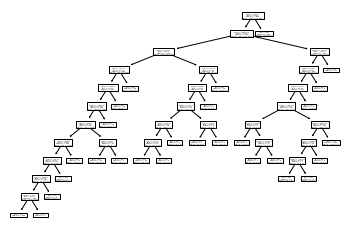

In [18]:
tree.plot_tree(Tree)

In [19]:
importances = pd.DataFrame(data={
    'Attribute': Xtv_num.columns,
    'Importance': Tree.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [20]:
importances

,Attribute,Importance
8,FLUORUROS_mg/L,0.206963
6,DUR_mg/L,0.186238
13,N_NO3_mg/L,0.138706
3,COLI_FEC_NMP/100_mL,0.108270
1,AS_TOT_mg/L,0.100334
7,FE_TOT_mg/L,0.090846
12,MN_TOT_mg/L,0.062413
0,ALC_mg/L,0.027093
5,CR_TOT_mg/L,0.024143
14,PB_TOT_mg/L,0.020347


**Selecciona las variables de mayor importancia.**

Decidimos tomar el top 5 variables numéricas por el feature importance mostrado. 

La característica principal es que las primeras 5 represetan cada uno al menos 10% de importancia en el modelo de sólo variables numéricas.

Con esto las variables seleccionadas son: 

- FLUORUROS_mg 
- DUR_mg
- N_NO3_mg
- COLI_FEC_NMP
- AS_TOT_mg



In [21]:
seleccion_num = ['FLUORUROS_mg/L', 'DUR_mg/L', 'N_NO3_mg/L', 'COLI_FEC_NMP/100_mL', 'AS_TOT_mg/L']

# **Explorar clasificador óptimo**

Decidimos probar los siguientes clasificadores: 

- Regresión Logística (Benchmark): es el clasificador base, en la industria se utiliza como el mínimo posible a superar.
- Árbol de decisión: simpleza en la decisión de clasificación, tomando sólo los atributos más importantes.
- Random Forest: ensamble de árboles que permite entrenar con distintos atributos en cada árbol, evitando sobre ajustar, y minimizar el error. 

En cada método se decidió hacer una búsqueda de malla (Grid Search), sobre un set de hiperparámetros que permita encontrar la mejor combinación de ellos para optimizar el resultado. 
Adicionalmente, se hace uso de validación cruzada por muestras aleatorias (RepeatedStratifiedKFold) para evitar el sobre ajuste, y optimizar el resultado, disminuyendo el error.

# Regresión Logística

Modelo

In [22]:
log_modelo = LogisticRegression(solver='liblinear',max_iter=5000)

Búsqueda de la mejor regresión logística como clasificador: 

- Grid search de parámetros.
- Método de validación cruzada de muestras para evitar sobre ajuste, y sub ajuste. 


In [23]:
# Diccionario para determinar la mejor combinación de los parámetros requeridos , consideremos que no todas las opciones posibles
# de parámetros se pueden combinar por ello seleccionamos solo aquellas posibles
dicc_hiperparam={'C':[0.00001,10.,10000.],
                   'penalty':['l1','l2'],
                   'class_weight':['balanced', None],
                   'solver':['liblinear']
             }

In [24]:
# Validación cruzada de 5 muestras con 3 repeticiones
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1234)

In [25]:
# Se hace la búsqueda de malla dentro del rango de los hiperparámetros propuestos, y sobre las validaciones cruzadas propuestas en el objeto (RepeatedStratifiedKFold)
log_grid = GridSearchCV(estimator=log_modelo, 
                        param_grid=dicc_hiperparam, 
                        cv=cv, 
                        scoring='accuracy')

Transformación de datos categóricos conforme al pipeline definido anteriormente. 

In [26]:
variables_seleccionadas = seleccion_num + catOHE_pipeline_nombres

In [27]:
Xtv_seleccion = Xtv[variables_seleccionadas]

In [28]:
Xx = columnasTransformer.fit_transform(Xtv_seleccion)

Se entrena el modelo sólo sobre la población de train

In [29]:
log_grid.fit(Xx, ytv.ravel())

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1234),
             estimator=LogisticRegression(max_iter=5000, solver='liblinear'),
             param_grid={'C': [1e-05, 10.0, 10000.0],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

**Visualización de resultados obtenidos:**

- Exactitud (accuracy) encontrado con el método de optimización.
- Hiperparámetros utilizados que optimizan el accuracy.

In [30]:
print('Mejor valor de exactitud obtenido con la mejor combinación:', log_grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', log_grid.best_params_)

Mejor valor de exactitud obtenido con la mejor combinación: 0.9945373237014103
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 10.0, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}


**Los resultados obtenidos son sospechosamente altos, y se sugiere que el modelo va a sobre ajustar sobre una población no conocida.**

In [31]:
log_model = LogisticRegression(C=10.0, class_weight=None, penalty='l1', solver='liblinear')

In [32]:
log_model.fit(Xx, ytv.ravel())

LogisticRegression(C=10.0, penalty='l1', solver='liblinear')

In [33]:
pred_test = log_model.predict(columnasTransformer.transform(Xtest[variables_seleccionadas]))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0, 3, 4, 21, 29] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


In [34]:
print('La exactitud obtenida con la mejor combinación en el set de validación (test) es:', accuracy_score(ytest, pred_test))

La exactitud obtenida con la mejor combinación en el set de validación (test) es: 0.9953271028037384


**Se decide no utilizar este modelo a pesar de los resultados favorable, ya que es posible que sobre ajuste en población no conocida**

**Se sugiere realizar pruebas out of time, y out of sample**

# Árbol de Decisión

Modelo

In [36]:
modeloDT = DecisionTreeClassifier()

Búsqueda del mejor árbol: 

- Grid search de parámetros.
- Método de validación cruzada de muestras para evitar sobre ajuste, y sub ajuste. 


In [37]:
# Definimos el diccionario con los siguientes hiperparametros a la busqueda: ccp_alpha, criterion, max_depth, min_samples_split y class_weight
dt_param_grid = {'ccp_alpha': [0.1, .01],
                  'criterion': ['gini', 'entropy'],
                  'max_depth': np.arange(1, 3, step=1),
                  'min_samples_split': np.arange(2, 10, step=1),
                  'class_weight': ['balanced', None]}

In [38]:
# Validación cruzada de 5 muestras con 3 repeticiones
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1234)

In [39]:
# Se hace la búsqueda de malla dentro del rango de los hiperparámetros propuestos, y sobre las validaciones cruzadas propuestas en el objeto (RepeatedStratifiedKFold)
dt_grid = GridSearchCV(estimator=modeloDT, 
                        param_grid=dt_param_grid, 
                        cv=cv, 
                        scoring='accuracy')

Transformación de datos categóricos conforme al pipeline definido anteriormente. 

In [40]:
Xtv_seleccion = Xtv[variables_seleccionadas]
Xx = columnasTransformer.fit_transform(Xtv_seleccion)

Se entrena el modelo sólo sobre la población de train

In [41]:
dt_grid.fit(Xx, ytv)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1234),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01],
                         'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

**Visualización de resultados obtenidos:**

- Exactitud (accuracy) encontrado con el método de optimización.
- Hiperparámetros utilizados que optimizan el accuracy.

In [42]:
print('Mejor valor de exactitud obtenido con la mejor combinación:', dt_grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', dt_grid.best_params_)

Mejor valor de exactitud obtenido con la mejor combinación: 0.8364407751404656
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}


**El performance del modelo con mejores hiperparámetros en validación:**

In [43]:
modeloDT = DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', criterion='gini', max_depth=2, min_samples_split=2)

In [44]:
modeloDT.fit(Xx, ytv)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=2)

In [45]:
pred_test = modeloDT.predict(columnasTransformer.transform(Xtest[variables_seleccionadas]))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0, 3, 4, 21, 29] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


In [46]:
print('La exactitud obtenida con la mejor combinación en el set de validación (test) es:', accuracy_score(ytest, pred_test))

La exactitud obtenida con la mejor combinación en el set de validación (test) es: 0.8130841121495327


# Random Forest

Modelo

In [47]:
modeloRF = RandomForestClassifier()

Búsqueda del mejor ensamble de árboles por la metodología de Random Forest:

- Grid search de parámetros.
- Método de validación cruzada de muestras para evitar sobre ajuste, y sub ajuste. 


In [48]:
# Incluiremos los siguientes hiperparametros a la busqueda: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. 
# Para el mejor ensamble de árboles con Random Forest
rf_param_grid = {'ccp_alpha': [0.1, .01,0.001],
                  'criterion': ['gini', 'entropy'],
                  'max_depth': np.arange(1, 3, step=1),
                  'min_samples_split': np.arange(2, 10, step=1),
                  'class_weight': ['balanced', None]}


In [49]:
# Validación cruzada de 5 muestras con 3 repeticiones
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=8)

In [50]:
# Se hace la búsqueda de malla dentro del rango de los hiperparámetros propuestos, y sobre las validaciones cruzadas propuestas en el objeto (RepeatedStratifiedKFold)
rf_grid = GridSearchCV(estimator=modeloRF, 
                        param_grid=rf_param_grid, 
                        cv=cv, 
                        scoring='accuracy')

Transformación de datos categóricos conforme al pipeline definido anteriormente. 

In [51]:
Xtv_seleccion = Xtv[variables_seleccionadas]
Xx = columnasTransformer.fit_transform(Xtv_seleccion)

Se entrena el modelo sólo sobre la población de train

In [52]:
rf_grid.fit(Xx, ytv.ravel())

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=8),
             estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

**Visualización de resultados obtenidos:**

- Exactitud (accuracy) encontrado con el método de optimización.
- Hiperparámetros utilizados que optimizan el accuracy.

In [53]:
print('Mejor valor de exactitud obtenido con la mejor combinación:', rf_grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', rf_grid.best_params_)

Mejor valor de exactitud obtenido con la mejor combinación: 0.893078775369797
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}


**El performance del modelo con mejores hiperparámetros en validación:**

In [54]:
modeloDT = RandomForestClassifier(ccp_alpha=0.001, class_weight='balanced', criterion='gini', max_depth=2, min_samples_split=3)

In [55]:
modeloDT.fit(Xx, ytv.ravel())

RandomForestClassifier(ccp_alpha=0.001, class_weight='balanced', max_depth=2,
                       min_samples_split=3)

In [56]:
pred_test = modeloDT.predict(columnasTransformer.transform(Xtest[variables_seleccionadas]))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0, 3, 4, 21, 29] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


In [57]:
print('La exactitud obtenida con la mejor combinación en el set de validación (test) es:', accuracy_score(ytest, pred_test))

La exactitud obtenida con la mejor combinación en el set de validación (test) es: 0.8457943925233645


# **Clasificador seleccionado**


Con los resultados obtenidos **elegimos Random Forest** por su poder de clasificación con un **Accuracy en Train de 0.89 y en Test de 0.85**

Adicionalmente, por la naturaleza del algoritmo se espera que no sobre ajuste en el TimestampConvertibleTypes

**El modelo propuesta con sus resultados serían los siguientes:**

In [58]:
variables_seleccionadas = seleccion_num + catOHE_pipeline_nombres

In [59]:
Xtv_seleccion = Xtv[variables_seleccionadas]
Xx = columnasTransformer.fit_transform(Xtv_seleccion)

In [60]:
modelo_final = RandomForestClassifier(ccp_alpha=0.001, class_weight='balanced', criterion='gini', max_depth=2, min_samples_split=3)

In [61]:
modelo_final.fit(Xx, ytv.ravel())

RandomForestClassifier(ccp_alpha=0.001, class_weight='balanced', max_depth=2,
                       min_samples_split=3)

In [62]:
pred_train = modelo_final.predict(Xx)
pred_test = modelo_final.predict(columnasTransformer.transform(Xtest[variables_seleccionadas]))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0, 3, 4, 21, 29] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


In [63]:
pred_test

array([2., 1., 2., 2., 0., 1., 2., 2., 1., 0., 0., 1., 0., 2., 2., 2., 0.,
       2., 0., 2., 0., 2., 2., 2., 1., 2., 1., 0., 0., 2., 2., 2., 0., 2.,
       2., 2., 2., 0., 2., 0., 2., 2., 2., 2., 1., 2., 2., 0., 2., 1., 1.,
       2., 2., 2., 2., 2., 1., 0., 1., 2., 1., 0., 2., 2., 2., 2., 1., 1.,
       0., 1., 1., 0., 2., 1., 0., 2., 0., 2., 0., 1., 1., 2., 0., 2., 0.,
       0., 0., 2., 2., 1., 0., 2., 1., 0., 1., 0., 2., 2., 2., 0., 2., 1.,
       2., 2., 1., 2., 2., 0., 2., 2., 1., 2., 2., 2., 1., 0., 2., 2., 2.,
       2., 1., 0., 0., 2., 1., 2., 2., 2., 2., 0., 0., 2., 1., 1., 2., 0.,
       0., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 2.,
       2., 0., 1., 2., 2., 1., 2., 1., 2., 0., 0., 2., 0., 2., 0., 0., 1.,
       2., 1., 0., 2., 0., 0., 2., 0., 2., 1., 0., 1., 2., 2., 0., 2., 2.,
       0., 2., 1., 0., 1., 1., 2., 0., 0., 2., 1., 2., 1., 0., 2., 1., 2.,
       2., 1., 1., 1., 2., 2., 2., 2., 1., 1.])

**Accuracy obtenido**

In [64]:
print('La exactitud obtenida con la mejor combinación en el set de Entrenamiento es:', accuracy_score(ytv, pred_train))
print('La exactitud obtenida con la mejor combinación en el set de validación (test) es:', accuracy_score(ytest, pred_test))

La exactitud obtenida con la mejor combinación en el set de Entrenamiento es: 0.8992974238875878
La exactitud obtenida con la mejor combinación en el set de validación (test) es: 0.8598130841121495


# **Reporte de clasificación**

In [65]:
target_names = ['Amarillo','Rojo','Verde']

In [66]:
print(classification_report(ytest, pred_test, target_names=target_names))

              precision    recall  f1-score   support

    Amarillo       0.76      0.98      0.86        43
        Rojo       0.98      0.63      0.77        78
       Verde       0.85      1.00      0.92        93

    accuracy                           0.86       214
   macro avg       0.87      0.87      0.85       214
weighted avg       0.88      0.86      0.85       214



# **Gráfica de precisión recall**

Al ser un problema multiclase, se entrena el modelo de nuevo con las especificaciones para poder realizar el plot por clase.

In [67]:
n_classes = len(set(['Amarillo','Rojo','Verde']))

In [68]:
Y_bin = label_binarize(y_ohe, classes=[*range(n_classes)])

In [69]:
Y_bin

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [70]:
Xtv, Xtest, ytv_bin, ytest_bin = train_test_split(X[variables_seleccionadas], Y_bin, test_size=0.2, random_state=1234)  

print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(ytv_bin.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest_bin.shape, ': dimensión de variable de salida para prueba')

(854, 42) : dimensión de datos de entrada para entrenamiento y validación
(214, 42) : dimensión de datos de entrada para prueba
(854, 3) : dimensión de variable de salida para entrenamiento y validación
(214, 3) : dimensión de variable de salida para prueba


In [71]:
Xx = columnasTransformer.transform(Xtv)
Xtest = columnasTransformer.transform(Xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0, 3, 4, 21, 29] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


In [72]:
clf = OneVsRestClassifier(RandomForestClassifier(class_weight='balanced', criterion='gini', max_depth=2, min_samples_split=3))
clf.fit(Xx, ytv_bin)
y_score = clf.predict(Xtest)

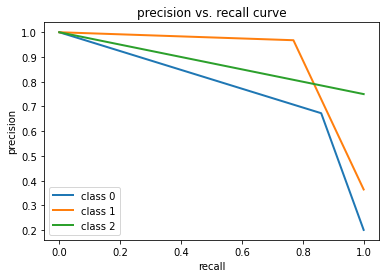

In [73]:
# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(ytest_bin[:, i],y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

# **Matriz de confusión en Set validación del modelo seleccionado**

In [74]:
confusion = confusion_matrix(ytest, pred_test)

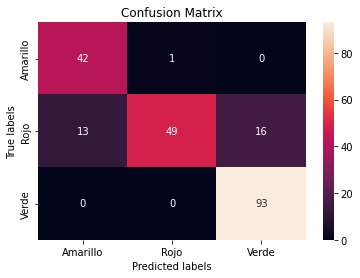

In [75]:
ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Amarillo', 'Rojo','Verde']); ax.yaxis.set_ticklabels(['Amarillo','Rojo','Verde']);



---


FIN RETO PARTE 2 



---

